<a href="https://colab.research.google.com/github/tawadesharad/Exploratory-Data-Analysis-Superstore-Dataset/blob/main/EDA_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SPARK FOUNDATION INTERNSHIP**

#**Exploratory data analysis on superstore dataset**

**Name:- SHARAD SHANTARAM TAWADE**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spark Foundation/EDA-Superstore/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**There are no null values in the dataset.**

In [5]:
df['Country'].unique()

array(['United States'], dtype=object)

In [10]:
qty=df[['Category','Quantity']].groupby('Category')['Quantity'].sum()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


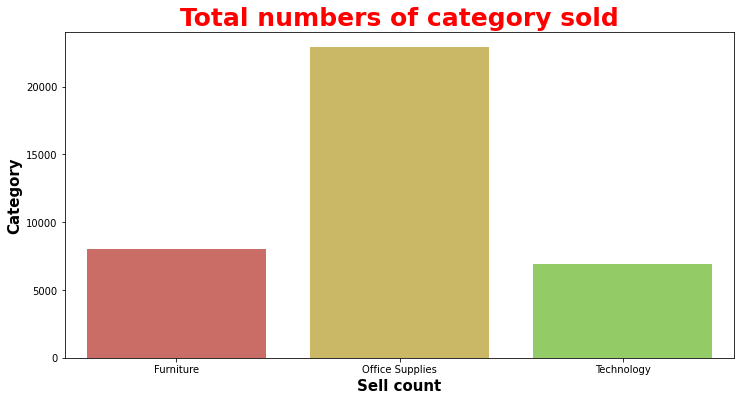

In [13]:
plt.subplots(figsize=(12,6))
sns.barplot(qty.index,qty.values,palette=sns.color_palette("hls", 8))
plt.title('Total numbers of category sold',weight='bold',fontsize=25,color='red')
plt.xlabel('Sell count',weight='bold',fontsize=15)
plt.ylabel('Category',weight='bold',fontsize=15)
plt.xticks(rotation= 0)
plt.show()

In [32]:
sales_by_city=df[['City','Sales']].groupby('City').sum().sort_values(by='Sales',ascending=False).head(10)
sales_by_city.index

Index(['New York City', 'Los Angeles', 'Seattle', 'San Francisco',
       'Philadelphia', 'Houston', 'Chicago', 'San Diego', 'Jacksonville',
       'Springfield'],
      dtype='object', name='City')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


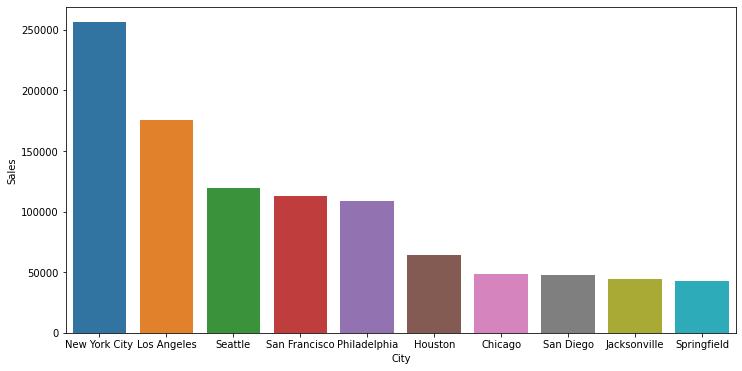

In [34]:
plt.subplots(figsize=(12,6))
sns.barplot(sales_by_city.index, sales_by_city['Sales'])

plt.show()